In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler

In [2]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [3]:
transactions = transactions.merge(customers, on='CustomerID', how='left')
transactions = transactions.merge(products, on='ProductID', how='left')

In [6]:
customer_features = transactions.groupby('CustomerID').agg({
    'TotalValue': ['sum', 'mean'],
    'ProductID': 'count',
    'Category': lambda x: x.nunique(),
    'Region': 'first'
}).reset_index()

customer_features.columns = [
    'CustomerID', 
    'TotalSpending', 
    'AvgTransactionValue', 
    'TransactionCount', 
    'UniqueCategories', 
    'Region'
]

customer_features = pd.get_dummies(customer_features, columns=['Region'])

In [7]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(customer_features.iloc[:, 1:])
customer_matrix = pd.DataFrame(scaled_features, columns=customer_features.columns[1:])

In [9]:
similarity_matrix = cosine_similarity(customer_matrix)

In [10]:
similarity_df = pd.DataFrame(
    similarity_matrix, 
    index=customer_features['CustomerID'], 
    columns=customer_features['CustomerID']
)

In [11]:
lookalike_dict = {}

# Iterate through each customer
for customer_id in similarity_df.index:
    # Get top 3 similar customers (excluding itself)
    similar_customers = similarity_df.loc[customer_id].sort_values(ascending=False)[1:4]
    lookalike_dict[customer_id] = list(zip(similar_customers.index, similar_customers.values))

In [12]:
lookalike_dict

{'C0001': [('C0152', 0.9999926011976817),
  ('C0107', 0.9994676925641001),
  ('C0011', 0.9989784638508258)],
 'C0002': [('C0142', 0.9977111125729623),
  ('C0134', 0.9943913144716523),
  ('C0186', 0.9926383457845525)],
 'C0003': [('C0001', 0.996697929365131),
  ('C0152', 0.996669401037667),
  ('C0107', 0.9959879743897866)],
 'C0004': [('C0108', 0.9978542558017911),
  ('C0012', 0.9971605384742013),
  ('C0155', 0.9966143151617873)],
 'C0005': [('C0159', 0.9999663297760574),
  ('C0186', 0.9981721462615398),
  ('C0123', 0.9950980857637598)],
 'C0006': [('C0158', 0.9979646732833836),
  ('C0148', 0.9959986699227823),
  ('C0187', 0.9950161911712916)],
 'C0007': [('C0115', 0.9950528575588955),
  ('C0159', 0.9947200950294984),
  ('C0140', 0.9942158186456764)],
 'C0008': [('C0109', 0.9971833780868338),
  ('C0098', 0.9934329039981148),
  ('C0024', 0.9855488750159498)],
 'C0009': [('C0010', 0.9901962543336894),
  ('C0198', 0.9884326662046993),
  ('C0199', 0.9839392143705086)],
 'C0010': [('C0199', 

In [13]:
lookalike_df = pd.DataFrame([
    {'CustomerID': cust, 'Lookalikes': lookalikes} 
    for cust, lookalikes in lookalike_dict.items()
])

In [14]:
lookalike_df

,CustomerID,Lookalikes
0,C0001,"[(C0152, 0.9999926011976817), (C0107, 0.999467..."
1,C0002,"[(C0142, 0.9977111125729623), (C0134, 0.994391..."
2,C0003,"[(C0001, 0.996697929365131), (C0152, 0.9966694..."
3,C0004,"[(C0108, 0.9978542558017911), (C0012, 0.997160..."
4,C0005,"[(C0159, 0.9999663297760574), (C0186, 0.998172..."
...,...,...
194,C0196,"[(C0044, 0.9920560328959659), (C0074, 0.989258..."
195,C0197,"[(C0132, 0.9998521429287366), (C0073, 0.999588..."
196,C0198,"[(C0062, 0.9932514322197351), (C0132, 0.988969..."
197,C0199,"[(C0010, 0.99883566426081), (C0062, 0.99526256..."


In [16]:
lookalike_df = lookalike_df[lookalike_df['CustomerID'].isin(customers['CustomerID'][:20])]
lookalike_df

,CustomerID,Lookalikes
0,C0001,"[(C0152, 0.9999926011976817), (C0107, 0.999467..."
1,C0002,"[(C0142, 0.9977111125729623), (C0134, 0.994391..."
2,C0003,"[(C0001, 0.996697929365131), (C0152, 0.9966694..."
3,C0004,"[(C0108, 0.9978542558017911), (C0012, 0.997160..."
4,C0005,"[(C0159, 0.9999663297760574), (C0186, 0.998172..."
5,C0006,"[(C0158, 0.9979646732833836), (C0148, 0.995998..."
6,C0007,"[(C0115, 0.9950528575588955), (C0159, 0.994720..."
7,C0008,"[(C0109, 0.9971833780868338), (C0098, 0.993432..."
8,C0009,"[(C0010, 0.9901962543336894), (C0198, 0.988432..."
9,C0010,"[(C0199, 0.99883566426081), (C0062, 0.99275641..."


In [17]:
lookalike_df.to_csv('Lookalike.csv', index=False)

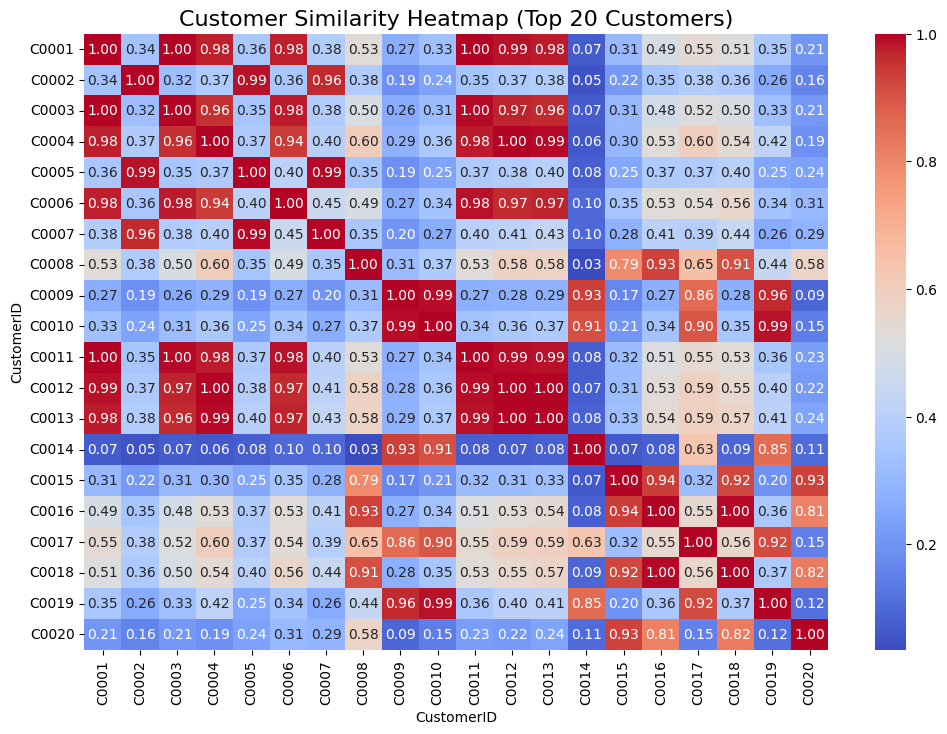

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(similarity_df.iloc[:20, :20], 
            cmap="coolwarm", 
            annot=True, 
            fmt=".2f", 
            xticklabels=customer_features['CustomerID'][:20], 
            yticklabels=customer_features['CustomerID'][:20])

plt.title('Customer Similarity Heatmap (Top 20 Customers)', fontsize=16)
plt.xlabel('CustomerID')
plt.ylabel('CustomerID')
plt.show()

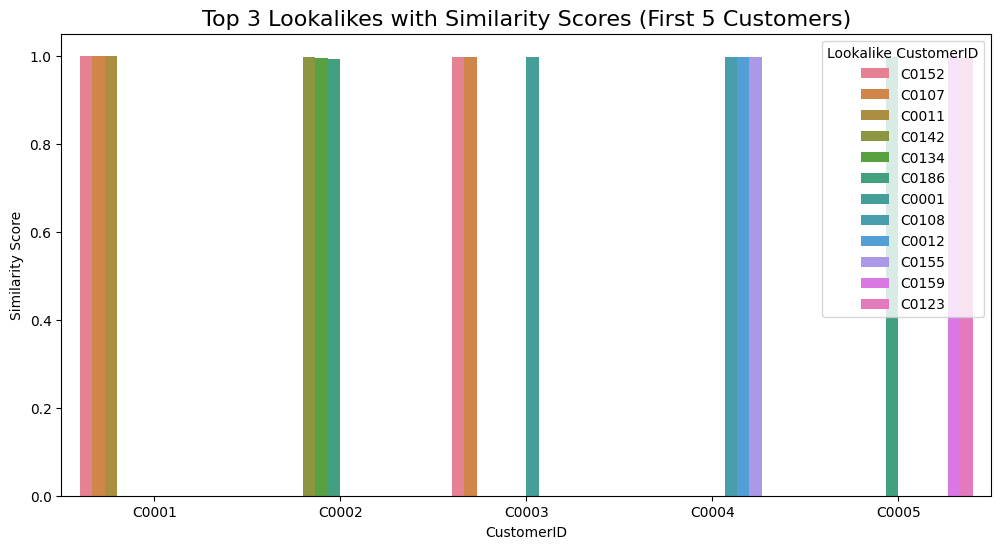

In [22]:
top_lookalikes = []
for customer, lookalikes in lookalike_dict.items():
    for lookalike, score in lookalikes:
        top_lookalikes.append({'CustomerID': customer, 'Lookalike': lookalike, 'Score': score})

lookalikes_df = pd.DataFrame(top_lookalikes)

plt.figure(figsize=(12, 6))
sns.barplot(
    x='CustomerID', 
    y='Score', 
    hue='Lookalike', 
    data=lookalikes_df[lookalikes_df['CustomerID'].isin(customer_features['CustomerID'][:5])]
)

plt.title('Top 3 Lookalikes with Similarity Scores (First 5 Customers)', fontsize=16)
plt.xlabel('CustomerID')
plt.ylabel('Similarity Score')
plt.legend(title='Lookalike CustomerID')
plt.show()

In [21]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)